# IT jobs salary analysis
Luca Di Bello - SUPSI - 2022/2023

## Introduction

The aim of this project is to analyze the salary of IT jobs in the field of Artificial Intelligence, Cyber Security and DevOps taking into consideration job title, company, location, seniority and industry.


## Datasets used:
- [IT Security jobs salary dataset](https://github.com/foorilla/infosec-jobs-com-salaries)
- [AI jobs salary dataset](https://github.com/foorilla/ai-jobs-net-salaries)
- [DevOps jobs salary dataset](https://github.com/foorilla/devops-jobs-net-salaries.git)

## Datasets contents:

Each row represents a yearly salary for a certain job position in a specific field (IT Security, AI or DevOps). 

The data has been collected through anonymous online surveys, here are the links to the original surveys:

- [IT Security jobs salary survey](https://infosec-jobs.com/salaries/form/)

- [AI jobs salary survey](https://ai-jobs.net/salaries/form/)

- DevOps jobs salary survey - not available


## Libraries used:
- pandas
- numpy
- plotly

## Datasets columns
This is the transcript of the columns of the datasets used in this project. The columns are the same for all the datasets.

- **work_year** - The year the salary was paid.
- **experience_level** - The experience level in the job during the year with the following possible values:
  - EN - Entry-level / Junior
  - MI - Mid-level / Intermediate
  - SE - Serior-level / Expert
  - EX - Executive-level / Director
- **employment_type** - The type of employement for the role:
  - PT - Part-time
  - FT - Full-time
  - CT - Contract
  - FL - Freelance
- **job_title** - The role worked in during the year.
- **salary** - The total gross salary amount paid.
- **salary_currency** - The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd** - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- **employee_residence** - Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio** - The overall amount of work done remotely, possible values are as follows:
  - 0 - No remote work (less than 20%)
  - 50 - Partially remote
  - 100 - Fully remote (more than 80%)
- **company_location** - The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size** - The average number of people that worked for the company during the year:
  - S - Less than 50 employees (small)
  - M - 50 to 250 employees (medium)
  - L - more than 250 employees (large)

This information has been found inside the official documentation of the datasets:
1) [IT Security jobs salary dataset description](https://salaries.ai-jobs.net/download/) 
2) [AI jobs salary dataset description](https://salaries.infosec-jobs.com/download/) 
3) [DevOps jobs salary dataset description](https://salaries.freshremote.work/download/) 

## Loading datasets
Loading the datasets and merging them into a single dataframe, thus simplifying the analysis.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the 3 different datasets
dfSec = pd.read_csv("https://raw.githubusercontent.com/foorilla/infosec-jobs-com-salaries/main/salaries.csv")
dfAi = pd.read_csv("https://raw.githubusercontent.com/foorilla/ai-jobs-net-salaries/main/salaries.csv")
dfDevops = pd.read_csv("https://raw.githubusercontent.com/foorilla/devops-jobs-net-salaries/main/salaries.csv")

# Add a new "type" column, used to identify the original dataset
dfSec["dataset_type"] = "SECURITY"
dfAi["dataset_type"] = "AI"
dfDevops["dataset_type"] = "DEVOPS"

# Merge data into a single big dataframe
df = pd.concat([dfSec, dfAi, dfDevops], join='outer', axis=0)

Converting **company_location** from ISO 3166-2 to ISO 3166-1 alpha-3 format using Wikipedia ISO country code dataset (https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3).

In [2]:
# Convert the company location field from ISO 3166-2 (two letters) to ISO 3166-1 (three letters)
# This is needed to be able to use the "locations" map
dfCountryCodes = pd.read_csv("datasets/wikipedia-iso-country-codes.csv")[["country_name", "Alpha-2 code", "Alpha-3 code"]]

# Merge on the Alpha-2 code but keep only the Alpha-3 code
df = df.merge(dfCountryCodes, left_on="company_location", right_on="Alpha-2 code", how="left")
df = df.drop(columns=["Alpha-2 code"])

# Rename the Alpha-3 code column to "company_location_alpha3"
df = df.rename(columns={"Alpha-3 code": "company_location_alpha3"})
df

work_year experience_level employment_type  \
0          2022               SE              FT   
1          2022               MI              FT   
2          2022               SE              FT   
3          2022               SE              FT   
4          2022               SE              FT   
...         ...              ...             ...   
3870       2021               EN              FT   
3871       2021               SE              FT   
3872       2020               SE              FT   
3873       2021               SE              FT   
3874       2021               MI              FT   

                            job_title  salary salary_currency  salary_in_usd  \
0             Staff Security Engineer  450000             USD         450000   
1       Application Security Engineer   18000             USD          18000   
2        Penetration Testing Engineer   40000             EUR          42009   
3            DevOps Security Engineer  100000             EUR         105024   
4                   Security Engineer  115000             USD         115000   
...                               ...     ...             ...            ...   
3870                  DevOps Engineer  100000             USD         100000   
3871                  DevOps Engineer  125000             CHF         136713   
3872  CloudOps Database Administrator  100000             EUR         114047   
3873                 DevOps Architect  165000             USD         165000   
3874                  DevOps Engineer   55000             EUR          65013   

     employee_residence  remote_ratio company_location company_size  \
0                    US            50               US            L   
1                    IN            50               IN            L   
2                    ES           100               ES            L   
3                    DE           100               DE            L   
4                    US             0               US            M   
...                 ...           ...              ...          ...   
3870                 US           100               US            L   
3871                 CH             0               CH            M   
3872                 NL             0               NL            L   
3873                 US           100               US            L   
3874                 FR           100               FR            S   

     dataset_type   country_name company_location_alpha3  
0        SECURITY  United States                     USA  
1        SECURITY          India                     IND  
2        SECURITY          Spain                     ESP  
3        SECURITY        Germany                     DEU  
4        SECURITY  United States                     USA  
...           ...            ...                     ...  
3870       DEVOPS  United States                     USA  
3871       DEVOPS    Switzerland                     CHE  
3872       DEVOPS    Netherlands                     NLD  
3873       DEVOPS  United States                     USA  
3874       DEVOPS         France                     FRA  

[3875 rows x 14 columns]

In [3]:
# Rename experience level to something more readable
df["experience_level"] = df["experience_level"].replace({"EN": "Junior", "MI": "Intermediate", "SE": "Senior", "EX": "Director"})

# Rename remote ratio to something more readable
df["remote_ratio"] = df["remote_ratio"].replace({0: "< 20% remote", 50: "Partial remote", 100: "> 80% remote"})

## Exploring the data
Analysis of the data to understand the data and its distribution.

In [4]:
df.dtypes

work_year                   int64
experience_level           object
employment_type            object
job_title                  object
salary                      int64
salary_currency            object
salary_in_usd               int64
employee_residence         object
remote_ratio               object
company_location           object
company_size               object
dataset_type               object
country_name               object
company_location_alpha3    object
dtype: object

### Data validation
The data is validated to ensure that it is correct and that it is ready for analysis.

In [5]:
# Validating manually data with known values
print("Experience level: ", df["experience_level"].unique())
print("Employment type: ", df["employment_type"].unique())
print("Company size: ", df["employment_type"].unique())
print("Dataset type: ", df["dataset_type"].unique())
print("Remote ratio:" , df["remote_ratio"].unique())
print("Salary currency:", df["salary_currency"].unique())
print("Employee residence:", df["employee_residence"].unique())
print("Company location:", df["company_location"].unique())
print("Company location:", df["company_size"].unique())


Experience level:  ['Senior' 'Intermediate' 'Junior' 'Director']
Employment type:  ['FT' 'PT' 'CT' 'FL']
Company size:  ['FT' 'PT' 'CT' 'FL']
Dataset type:  ['SECURITY' 'AI' 'DEVOPS']
Remote ratio: ['Partial remote' '> 80% remote' '< 20% remote']
Salary currency: ['USD' 'EUR' 'INR' 'GBP' 'AUD' 'CAD' 'SEK' 'BRL' 'CHF' 'DKK' 'SGD' 'MXN'
 'ILS' 'PLN' 'NOK' 'IDR' 'NZD' 'HUF' 'ZAR' 'TWD' 'CZK' 'CNY' 'JPY' 'TRY'
 'CLP' 'HKD' 'RUB' 'PHP']
Employee residence: ['US' 'IN' 'ES' 'DE' 'CA' 'FR' 'GB' 'CZ' 'AU' 'FI' 'IT' 'PT' 'IE' 'PY'
 'GR' 'SE' 'CY' 'BA' 'BR' 'BW' 'TW' 'NL' 'AE' 'CH' 'DK' 'CL' 'SG' 'PK'
 'GH' 'AZ' 'RO' 'AR' 'DZ' 'AF' 'SI' 'HR' 'HU' 'MX' 'IL' 'PL' 'CR' 'JP'
 'NG' 'NO' 'ID' 'EE' 'KG' 'KE' 'BG' 'IR' 'NZ' 'BE' 'ZA' 'AT' 'LU' 'EG'
 'SA' 'LT' 'RU' 'TR' 'AS' 'SK' 'CN' 'PR' 'TH' 'BO' 'PH' 'DO' 'MY' 'HN'
 'TN' 'VN' 'IQ' 'UA' 'JE' 'RS' 'CO' 'HK' 'MD' 'MT' 'LV' 'AM' 'ZW' 'UY'
 'AL' 'MK' 'GT' 'SV' 'EC']
Company location: ['US' 'IN' 'ES' 'DE' 'CA' 'FR' 'GB' 'CZ' 'AU' 'FI' 'IT' 'IE' 'PY' 'GR'
 '

In [6]:
# Now, check if numeric data is OK
print("N. invalid salaries:", (df["salary"] <= 0).sum())
print("N. invalid salaries in USD:", (df["salary_in_usd"] <= 0).sum())

N. invalid salaries: 0
N. invalid salaries in USD: 0


### Time frame of the data
The data is from 2020 - 2022, so we have roughly 2 years of data.


> Note: This time frame matches roughly the time frame of the COVID-19 pandemic.

In [7]:
print("AI dataset time frame: ", dfAi["work_year"].min() , "-", dfAi["work_year"].max())
print("DevOps dataset time frame: ", dfDevops["work_year"].min() , "-", dfDevops["work_year"].max())
print("IT security dataset time frame: ", dfSec["work_year"].min() , "-", dfSec["work_year"].max())

AI dataset time frame:  2020 - 2022
DevOps dataset time frame:  2020 - 2022
IT security dataset time frame:  2020 - 2022


### Amount of data per dataset
The amount of data per dataset is shown in the following pie chart. We can see that IT Security jobs dataset has the most data (nearly half of all the available data), followed by AI jobs and finally DevOps jobs.

> Note: As we will see in the next section, DevOps has less data because the dataset used has not been updated since 8 months.

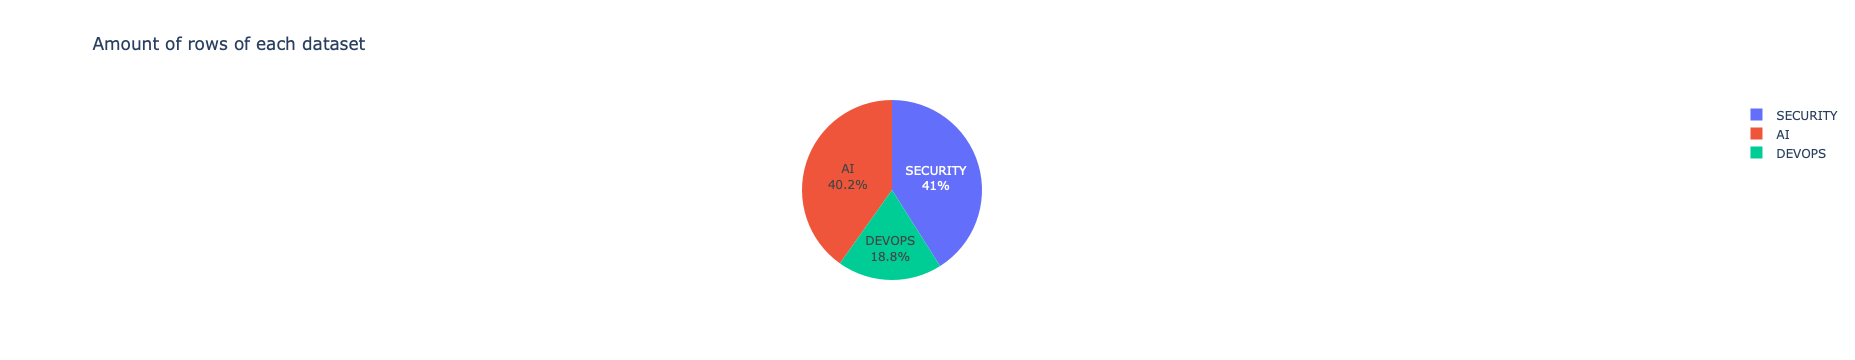

In [8]:
fig = px.pie(df, names="dataset_type", title='Amount of rows of each dataset')
fig.update_layout(width=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Amount of data per year
We can see that there is a steady increase in the amount of data per year, which is expected as the years go by, since the IT jobs covered in this project are increasingly in demand.

We notice that in 2022, the amount of data of the IT Security jobs dataset is significantly lower than the other datasets. This is because the dataset is older than the other datasets and it has not been updated since 8 months ago (check official GitHub repository [here](https://github.com/foorilla/devops-jobs-net-salaries)).

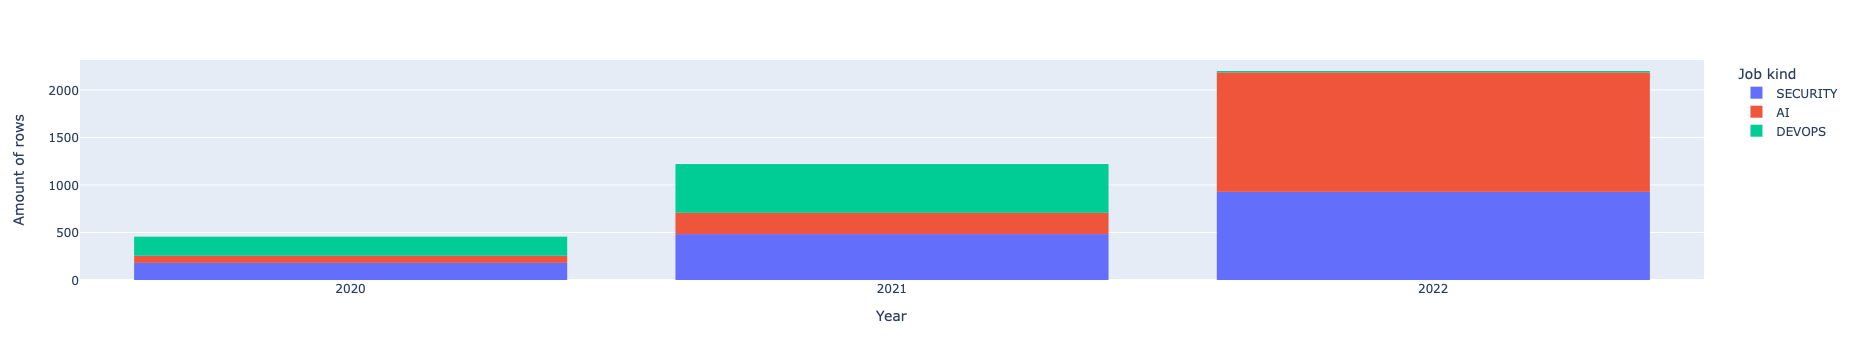

In [9]:
fig = px.histogram(df, x="work_year", color="dataset_type")
fig.update_xaxes(type='category', categoryorder='category ascending', title="Year")
fig.update_layout(legend_title_text='Job kind', width=1000)
fig.update_yaxes(title="Amount of rows")
fig.show()

### Company location distribution
We can see that the majority of the data is from the US (United States), followed by the GB (United Kingdom) and CA (Canada).

This is expected since the IT jobs covered in this project are in high demand in these countries.

> Note: Since the amount of data from the US is so high, we will focus our analysis on the US to have more accurate results.

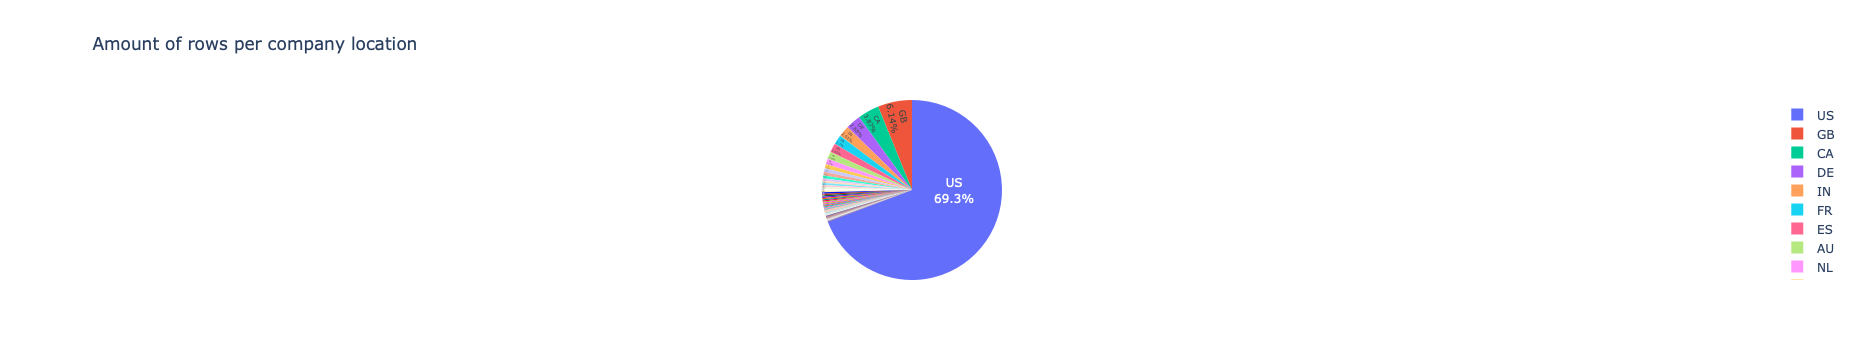

In [10]:
fig = go.Figure(data=[go.Pie(labels=df["company_location"], insidetextorientation='radial')])
fig.update_layout(title="Amount of rows per company location")
fig.update_traces(textposition='inside', textinfo='percent+label', hoverinfo="value+label+percent")
fig.show()

## Employee residence and remote ratio distribution in US companies

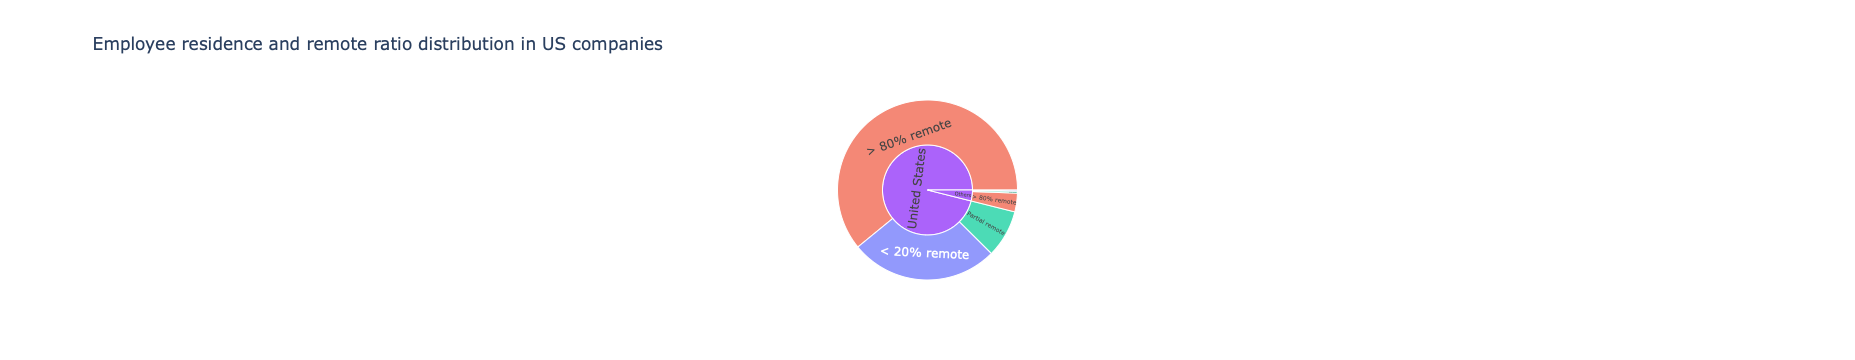

In [11]:
copyDf = df.copy().loc[df["company_location"] == "US"]

# Show pie chart of amount of rows per employee residence
isUs = df["employee_residence"] == "US"
isForeigner = df["employee_residence"] != "US"

copyDf.loc[isUs, "employee_residence"] = "United States"
copyDf.loc[isForeigner, "employee_residence"] = "Others"

# Show pie char of amount of rows per employee residence + show subgroups of US and foreigner that are remote using a sunburst chart
px.sunburst(copyDf,
  path=["employee_residence", "remote_ratio"],
  color="remote_ratio",
  title="Employee residence and remote ratio distribution in US companies",
  labels={"remote_ratio": "Remote ratio", "employee_residence": "Employee residence"},
)

## Data analysis

### Average annual salary in USD per job kind in the US
We can see that the average salary of the AI jobs is the highest (*around 127K, 01.11.2022*), followed by the DevOps jobs (*around 103K, 01.11.2022*) and finally the IT Security jobs (*around 118k, 01.11.2022*).

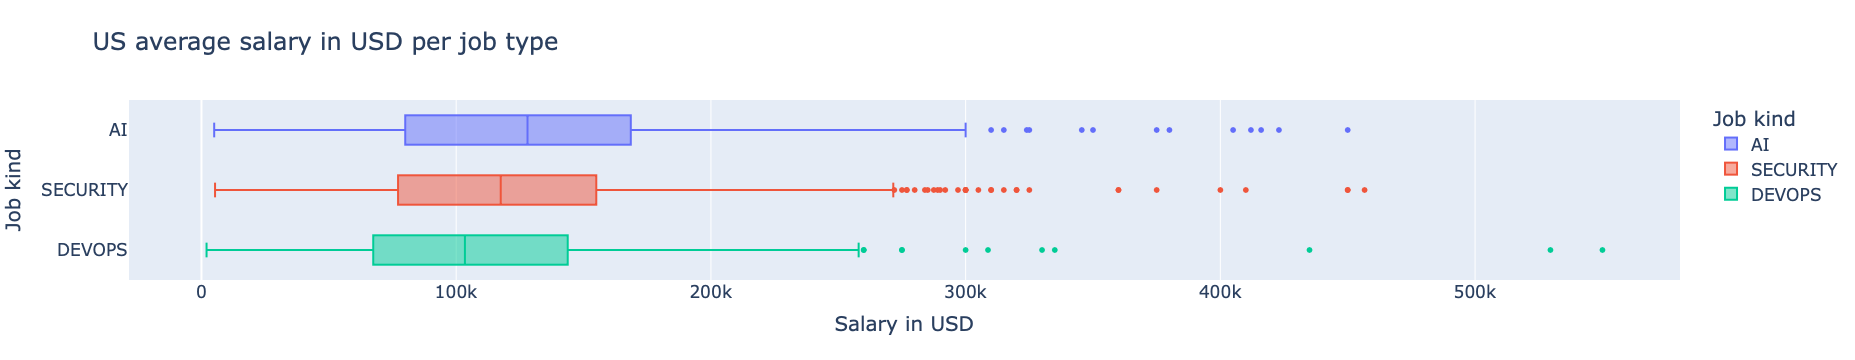

In [12]:
fig = px.box(df, x="salary_in_usd", y="dataset_type", color="dataset_type", title="US average salary in USD per job type", category_orders={"dataset_type": ["AI", "SECURITY", "DEVOPS"]})
fig.update_layout(legend_title_text='Job kind', width=1000, xaxis_title="Salary in USD", yaxis_title="Job kind", font=dict(size=17))
fig.show()

## Top 10 most paid job titles in the US

In the following bar chart, we can see the top 10 most paid job title in the US, with the average salary for each job title.

We can see that the top 3 most paid job titles are:

1. **Cloud Infrastructure Engineer** - *around 500k, 01.11.2022*
2. **Staff Security Engineer** - *around 450k, 01.11.2022*
3. **Research scientist** - *around 450K, 01.11.2022*

> Note: This data cannot be considered as accurate, since the amount of data for each job title is really low. This kinds of jobs are very elitist and are not very common thus not permitting precise results.

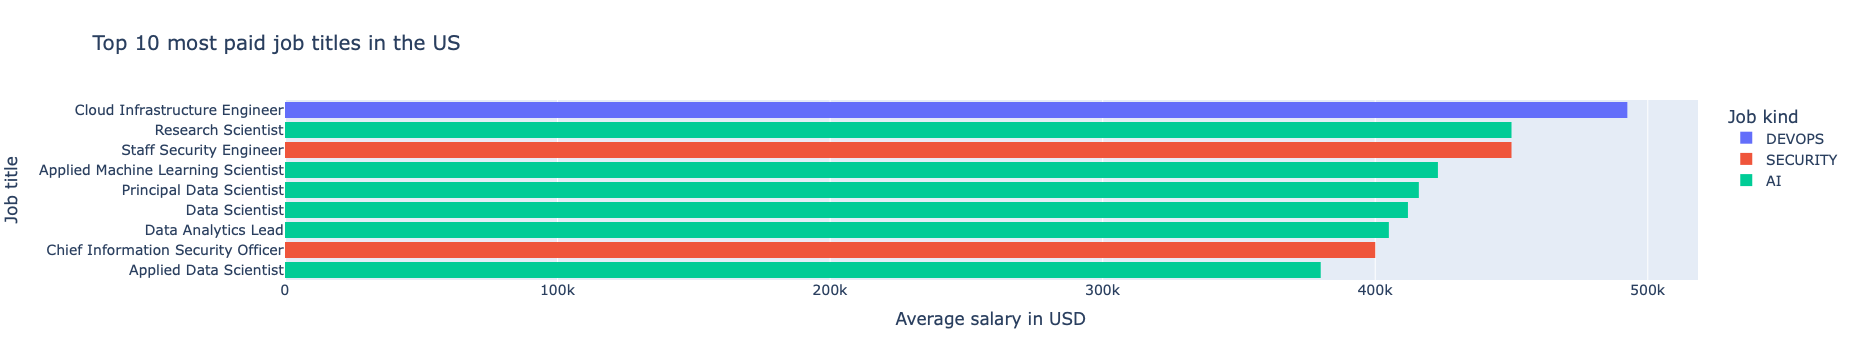

In [13]:
USData = df.loc[df["company_location"] == "US"].sort_values(by="salary_in_usd", ascending=False).head(11)

# Average salary per job title per job kind
fig = px.histogram(USData, x="salary_in_usd", y="job_title", color="dataset_type", title="Top 10 most paid job titles in the US", histfunc="avg")
fig.update_yaxes(type='category', categoryorder='mean ascending', title="Job title")
fig.update_xaxes(title="Average salary in USD")
fig.update_layout(legend_title_text='Job kind', width=1000, font=dict(size=14))
fig.show()

## The 10 most common and well-paying jobs in the US

In the following bar chart, we can see the top 10 most common and paid job titles in the US, with the average salary for each job title.

This plot is more representative of the IT field since the salary analysis is limited to the most common job titles (the ones with the highest amount of data).


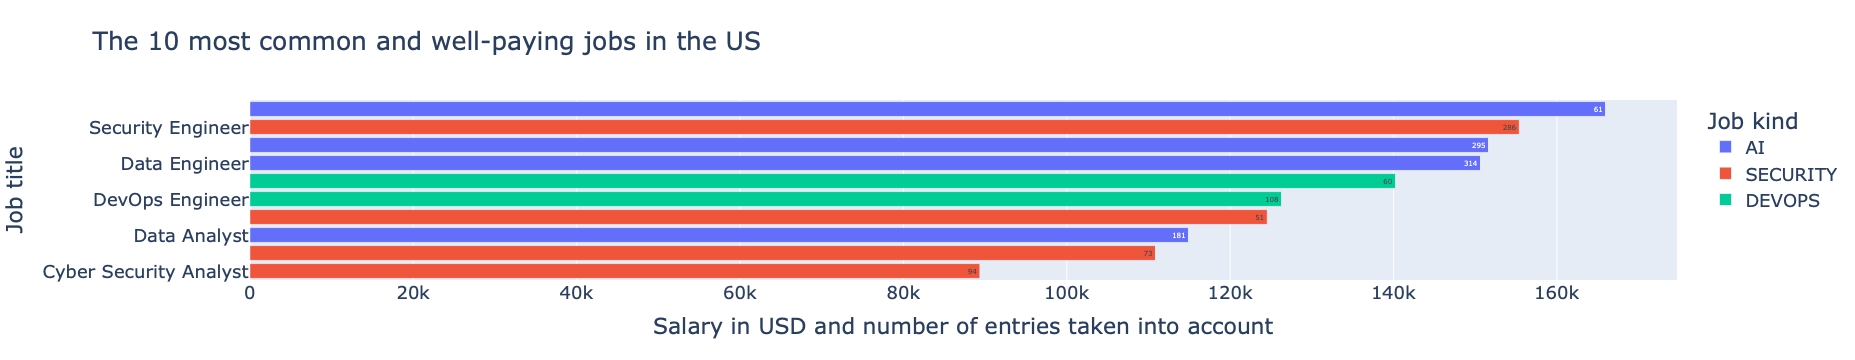

In [14]:
# Now, compute most common job titles per job kind
usJobTitles = df.loc[df["company_location"] == "US"].groupby("job_title")

# Now, compute most common job titles per job kind
job_entries_per_title = usJobTitles.size().sort_values(ascending=False).to_frame().rename(columns={0: "count"}).reset_index()
job_salaries_per_title = usJobTitles["salary_in_usd"].mean().sort_values(ascending=False).to_frame().reset_index()
job_dataset_type_per_title = usJobTitles["dataset_type"].first().to_frame().reset_index()

# Merge the two dataframes into one
job_entries_salaries_per_title = job_entries_per_title.merge(job_salaries_per_title, on="job_title", how="left").merge(job_dataset_type_per_title, on="job_title", how="left")

# Now, order by count and then by salary
job_entries_salaries_per_title = job_entries_salaries_per_title.sort_values(by=["count", "salary_in_usd"], ascending=False)

# Now, show the top 10 in a bar chart
fig = px.bar(job_entries_salaries_per_title.head(10), x="salary_in_usd", y="job_title", color="dataset_type", title="The 10 most common and well-paying jobs in the US", text="count")
fig.update_yaxes(type='category', categoryorder='mean ascending', title="Job title")
fig.update_xaxes(title="Salary in USD and number of entries taken into account")
fig.update_layout(legend_title_text='Job kind', width=1000, font=dict(size=14))
fig.show()

### World average salary in USD per company location

In the following bar chart, we can see the average salary per company location.
We can see that the top 5 company locations with the highest average salary are:

1) PR (Puerto Rico)
2) US (United States)
3) AE (United Arab Emirates)
4) BW (Botswana)
5) CA (Canada)

Surprisingly Switzerland (CH), even though it is one of the countries with the highest average salary in the world, is only in the 10th position with an average salary of 110K USD. This is probably due to the fact that the amount of salary data related to Swiss countries is very low (< 0.1% of total rows).

> Note: This result is not precise since the amount of data per company location is not the same. For example, the US has the most data, so the average salary of the US is more precise than the average salary of the other countries.

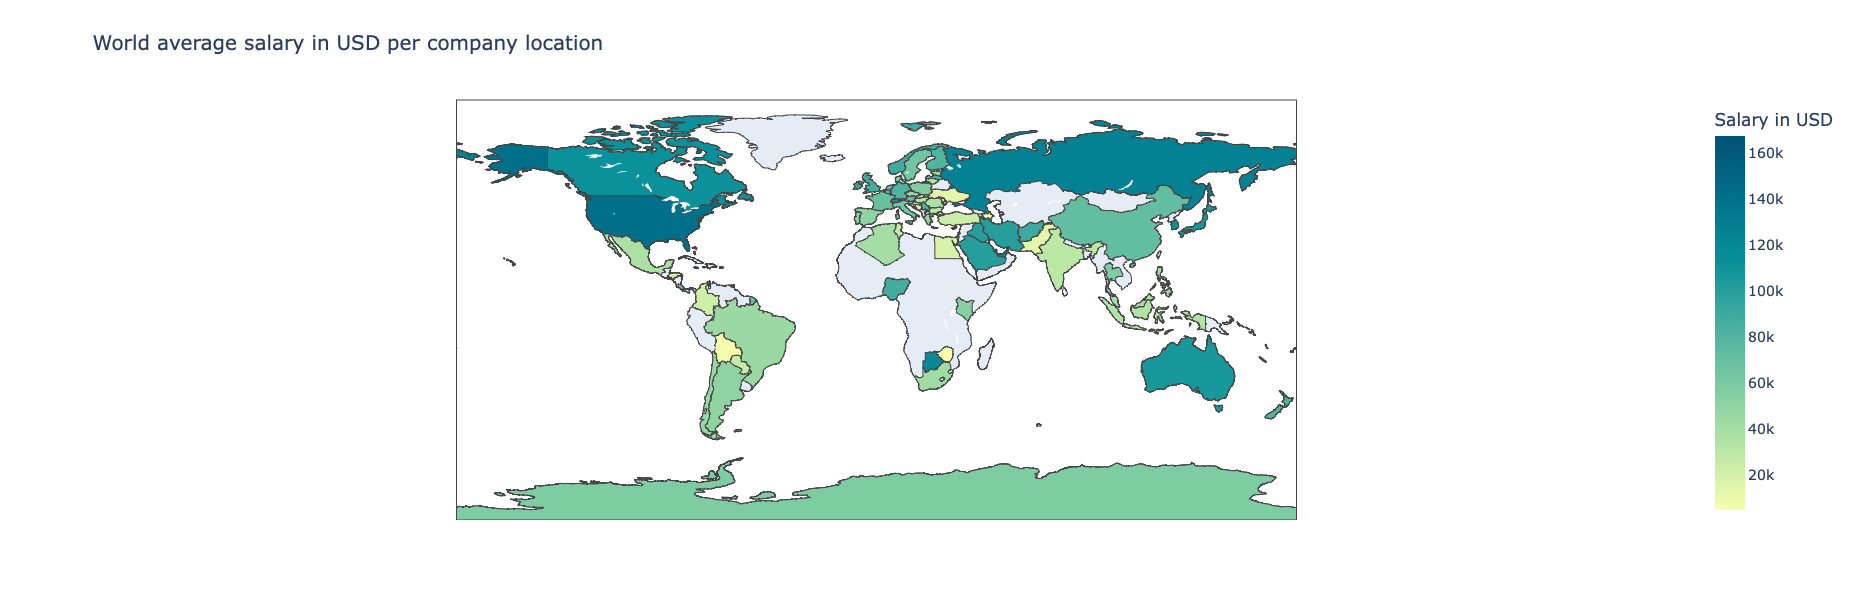

In [15]:
# Compute the average salary for each country
dfCountry = df.groupby("company_location_alpha3")["salary_in_usd"].mean().sort_values(ascending=False).reset_index()
# Add also company_location in alpha-2 format
dfCountry = dfCountry.merge(dfCountryCodes, left_on="company_location_alpha3", right_on="Alpha-3 code", how="left").drop(columns=["Alpha-3 code"])
fig = px.choropleth(
  dfCountry,
  locations="company_location_alpha3",
  hover_name="country_name",
  color_continuous_scale=px.colors.sequential.Bluyl,
  title="World average salary in USD per company location",
  color="salary_in_usd",
  locationmode="ISO-3",
  hover_data=["salary_in_usd", "country_name"]
)
fig.update_layout(width=1000, height=600, coloraxis_colorbar=dict(title="Salary in USD"), font=dict(size=14))
fig.show()

## US vs Europe vs Rest of the world - Average salary in USD per experience level and job kind

With the following heatmap, we can see the average salary per experience level and job kind (AI, IT Security or DevOps) in the US and in Europe. US companies pay the most for all the job kinds and experience levels, followed by Europe and finally the rest of the world (Asia, Africa, Oceania, etc.).

Should be taken into account that the salary data is without taxes and health care, so the salary in the US is not as high as it seems since the additional costs are higher than in Europe (for example, the average cost of health care in the US is 18.5% of the salary, while in Europe it is 11.5% of the salary).

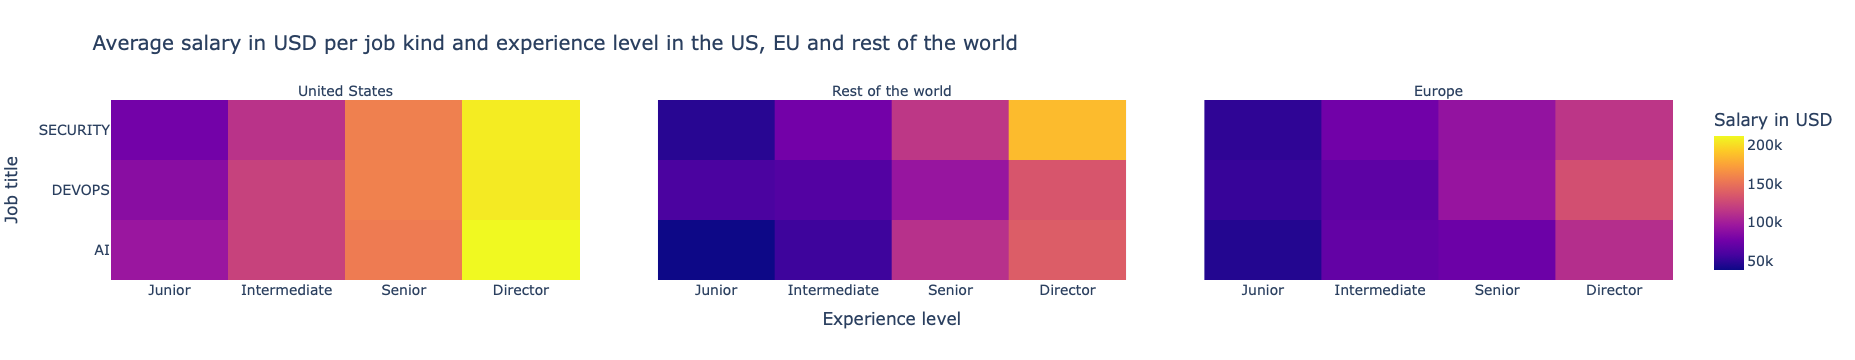

In [16]:
# Now, divide company location into 3 categories: US, Europe and Rest of the world
copyDf = df.copy()
isEurope = copyDf["company_location"].isin(["DE", "FR", "GB", "ES", "IT", "NL", "SE", "CH", "BE", "AT", "DK", "NO", "IE", "FI", "CZ", "PL", "PT", "GR", "HU", "RO", "SK", "SI", "BG", "HR", "LT", "LV", "EE", "CY", "LU", "MT", "IS", "LI", "AL", "MK", "BA", "MD", "ME", "RS", "TR", "UA", "BY", "XK"])
isUs = copyDf["company_location"] == "US"
isRestOfTheWorld = ~isEurope & ~isUs

copyDf.loc[isEurope, "company_location"] = "Europe"
copyDf.loc[isUs, "company_location"] = "United States"
copyDf.loc[isRestOfTheWorld, "company_location"] = "Rest of the world"

# Now, show an heatmap of the average salary in USD per job title type and experience level in the US and Europe
fig = px.density_heatmap(
  copyDf,
  z="salary_in_usd",
  x="experience_level",
  y="dataset_type",
  title="Average salary in USD per job kind and experience level in the US, EU and rest of the world",
  histfunc="avg",
  category_orders={"experience_level": ["Junior", "Intermediate", "Senior", "Director"]},
  facet_col="company_location",
  facet_col_wrap=3,
  facet_col_spacing=0.05,
  facet_row_spacing=0.05,
)
fig.update_layout(width=1000, coloraxis_colorbar=dict(title="Salary in USD"))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# Print only the middle label
for axis in fig.layout:
   if type(fig.layout[axis]) == go.layout.XAxis:
        if axis == "xaxis2":
          fig.layout["xaxis2"].title="Experience level"
        else:
          fig.layout[axis].title=""
fig.update_yaxes(type='category', categoryorder='mean ascending', title_text="Job title", col=1, matches=None, showticklabels=True, visible=True)
fig.update_layout(font=dict(size=14))
fig.show()

### Average salary in USD per company size in the US

In the following histogram, we can see the average salary per company size. We can see that the average salary of the employees that work in a medium-sized company is the highest, followed by the employees that work in a large-sized company and, finally, the employees that work in a small-sized company.

This result is unexpected since we would expect that the employees that work in a large-sized company have the highest average salary, since this big company usually has more resources thus having the ability to pay more to its employees.

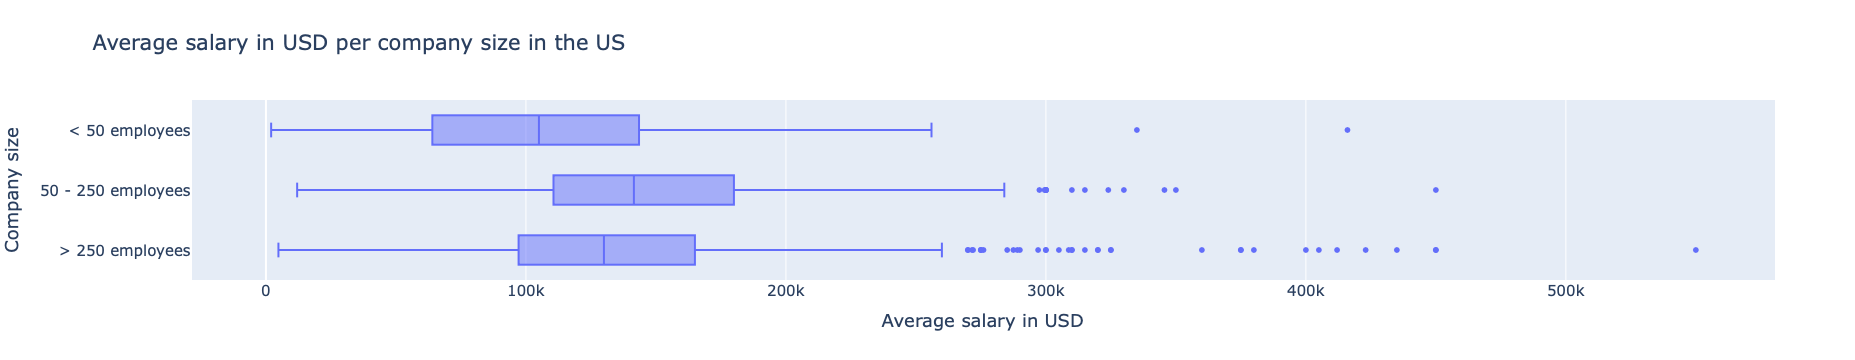

In [17]:
# Rename the company size to make them more readable
copyDf = df.copy().loc[df["company_location"] == "US"]
copyDf["company_size"] = copyDf["company_size"].replace({"S": "< 50 employees", "M": "50 - 250 employees", "L": "> 250 employees"})

# World average salary in USD per company size
fig = px.box(
  copyDf,
  x="salary_in_usd",
  y="company_size",
  title="Average salary in USD per company size in the US", 
  category_orders={"company_size": ["< 50 employees", "50 - 250 employees", "> 250 employees"]}
)
fig.update_xaxes(title="Average salary in USD")
fig.update_yaxes(title="Company size")
fig.update_layout(width=1000, font=dict(size=15))
fig.show()

### Average salary in USD per remote ratio and job kind in the US

In the following histogram, we can see the average salary per remote ratio. We can also notice that the yearly average salary in DevOps and AI varies only slightly depending on the remote ratio (couple of thousands of dollars).

In the other hand, the average salary of an employee that works in DevOps < 20% remotely and partially remotely is very similar, but the salary of an employee that works > 80% remotely (categorized as "Full Remote") is significantly higher than the other two categories (around 20K USD more).

Is possible to notice that the salary of employees that work full remote is the highest. This is probably due to the fact that the data timeframe is 2020 - 2022, which is exactly the period of the COVID-19 pandemic. During this period, most of the companies have allowed their employees to work remotely, providing the same salary as if they were working in the office due to the exceptional circumstances.

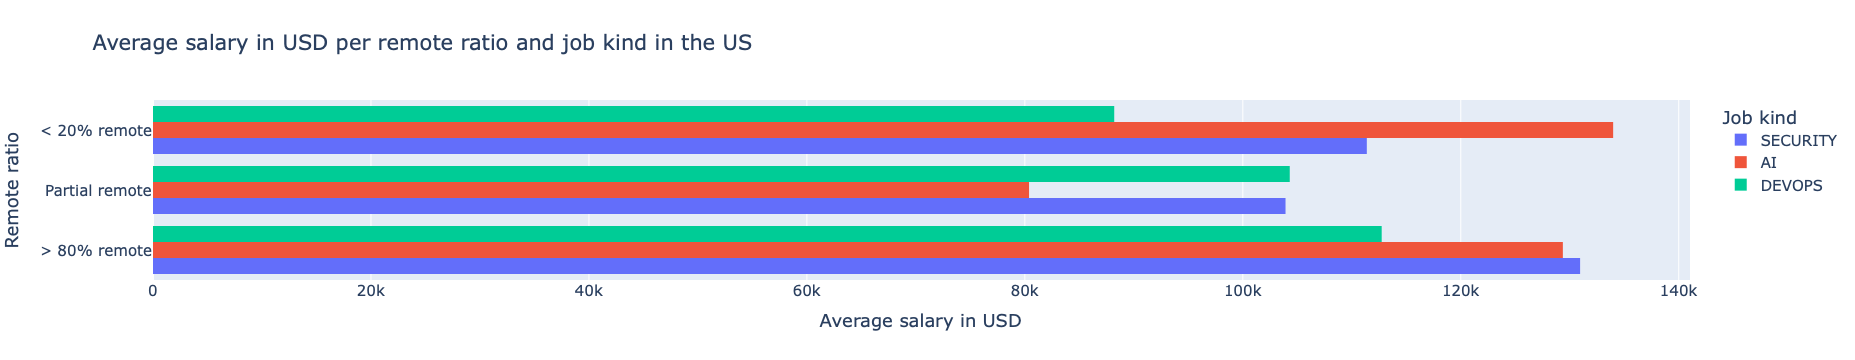

In [18]:
# Rename the remote ratio to make them more readable
copyDf = df.copy()

# Average salary in USD per remote ratio
fig = px.histogram(
  copyDf,
  x="salary_in_usd", 
  y="remote_ratio",
  color="dataset_type",
  title="Average salary in USD per remote ratio and job kind in the US",
  histfunc="avg",
  category_orders={"remote_ratio": ["< 20% remote", "Partial remote", "> 80% remote"]},
  barmode="group"
)
fig.update_layout(width=1000, legend_title_text='Job kind', font=dict(size=15))
fig.update_xaxes(title="Average salary in USD")
fig.update_yaxes(type='category', title="Remote ratio")
fig.show()

### Average salary in USD per employment type and experience level in the US

In the following bar chart, we can see the average salary per employment type and experience level in the US per each experience level.
Expectedly, we can notice also that there are any `directors` as `freelance` or `part-time`.

We notice also that employees that work freelance have the lowest average salary. This is due to the fact that the freelancers usually work for multiple companies part-time, so they have a lower average salary than the employees that work by contract or full-time.
Part-time employees have the lowest average salary, which is expected since they work less hours than the other kind of employees.

> Note: Contract employees are usually employees that work for a company for a limited amount of time (usually 1 year) and then they are replaced by another employee.

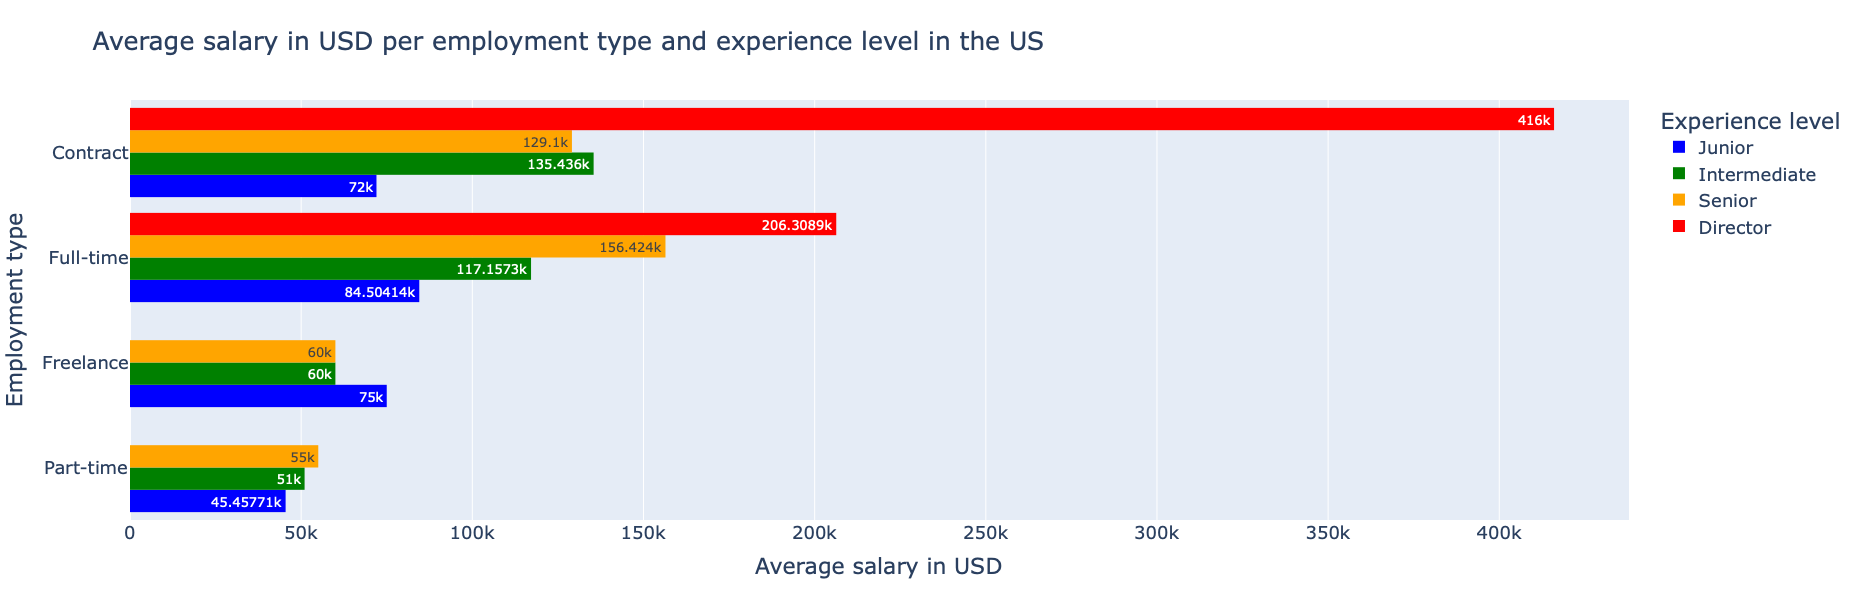

In [19]:
# Rename the employment types to make them more readable
copyDf = df.copy().loc[df["company_location"] == "US"]
copyDf["employment_type"] = copyDf["employment_type"].replace({"FT": "Full-time", "PT": "Part-time", "CT": "Contract", "FL": "Freelance"})

# World average salary in USD per employment type
fig = px.histogram(
  copyDf,
  x="salary_in_usd",
  y="employment_type",
  color="experience_level",
  title="Average salary in USD per employment type and experience level in the US",
  histfunc="avg",
  barmode="group",
  text_auto=True,
  category_orders={"experience_level": ["Junior", "Intermediate", "Senior", "Director"]},
  color_discrete_map={"Junior": "blue", "Intermediate": "green", "Senior": "orange", "Director": "red"}
)
fig.update_yaxes(type='category', categoryorder='mean ascending', title = "Employment type")
fig.update_xaxes(title = "Average salary in USD")
fig.update_layout(bargap=0.15, width=1100, height=600, legend_title_text='Experience level', font=dict(size=18))
fig.show()

### Average salary in USD per job rank and experience level in the US

With the following heatmap, we can see the average salary per job rank and experience level in the US.

As expected, we can also notice that the employees that have more experience have the highest average salary in all the job levels.

> Unfortunately, the analysis has been limited to the job rankings that are available for all job kinds (AI, IT Security and DevOps) to have a fair comparison.

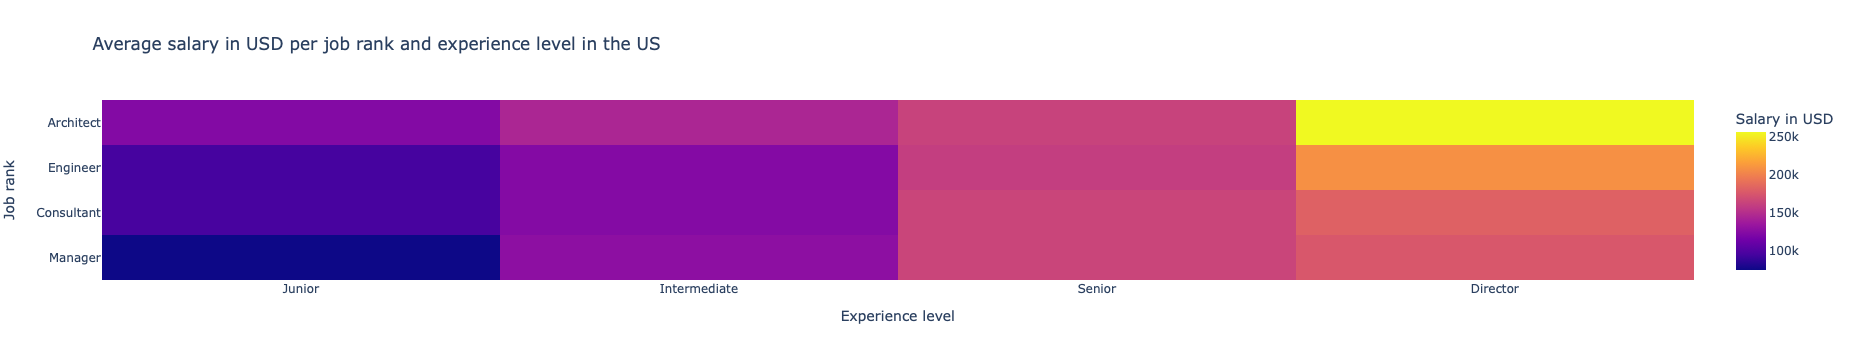

In [20]:
copyDf = df.copy()
copyDf["job_title"] = copyDf.loc[copyDf["company_location"] == "US" ,"job_title"].str.split(" ").str[-1]

# Find all job titles present in all 3 datasets to have a fair comparison
selected_titles = copyDf[["job_title", "dataset_type"]].groupby(["job_title", "dataset_type"]).size().reset_index(name="count").groupby("job_title").filter(lambda x: len(x) == 3)["job_title"].unique().astype(str)

# Now, select only the job rank we are interested in
copyDf = copyDf.loc[copyDf["job_title"].isin(selected_titles)]

# Now, show an heatmap of the average salary in USD per job rank and experience level
fig = px.density_heatmap(
  copyDf,
  z="salary_in_usd",
  x="experience_level",
  y="job_title",
  title="Average salary in USD per job rank and experience level in the US",
  histfunc="avg",
  category_orders={"experience_level": ["Junior", "Intermediate", "Senior", "Director"]},
)
fig.update_yaxes(type='category', categoryorder='mean ascending')
fig.update_layout(xaxis_title="Experience level", yaxis_title="Job rank", width=1000, coloraxis_colorbar=dict(title="Salary in USD"))
fig.show()

### Average salary in USD per job rank and job kind in the US

With the following heatmap, we can see the average salary per job level kind and job kind (AI, IT Security or DevOps) in the US.

With these information, we can see that Architecs have the highest salary, followed by Managers and then Engineers. This is expected since the Architects are the ones that design the software, the Managers are the ones that manage the software development and the Engineers are the ones that develop the software.

Unexpectedly, we can notice that Consultants in AI have the lowest average salary with a gap of aroung 20k USD compared to the other job kinds with the same job level.

> Unfortunately, the analysis has been limited to the job ranks that are available for all job kinds (AI, IT Security and DevOps) to have a fair comparison.

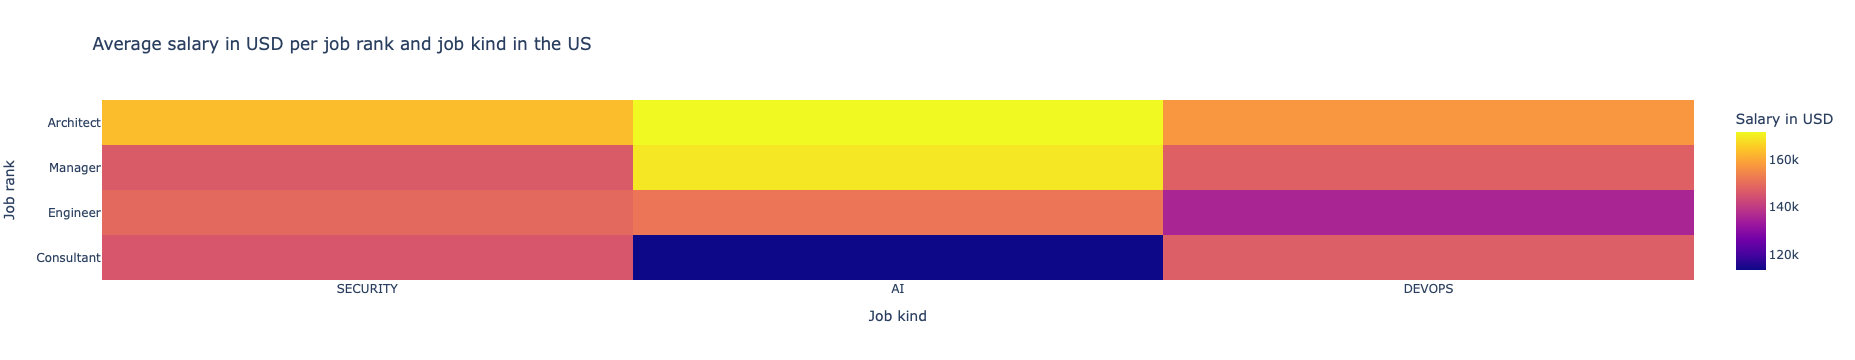

In [21]:
# Extract job title types (last word)
copyDf = df.copy()
copyDf["job_title"] = copyDf.loc[copyDf["company_location"] == "US" ,"job_title"].str.split(" ").str[-1]

# Find all job titles present in all 3 datasets to have a fair comparison
selected_titles = copyDf[["job_title", "dataset_type"]].groupby(["job_title", "dataset_type"]).size().reset_index(name="count").groupby("job_title").filter(lambda x: len(x) == 3)["job_title"].unique().astype(str)

# Select only the job title types we are interested in
copyDf = copyDf.loc[copyDf["job_title"].isin(selected_titles)]

# Show an heatmap of the average salary in USD per job title type and experience level
fig = px.density_heatmap(
  copyDf,
  z="salary_in_usd",
  x="dataset_type",
  y="job_title",
  title="Average salary in USD per job rank and job kind in the US",
  histfunc="avg",
)

# If average is 0 then we should not show it
fig.update_yaxes(type='category', categoryorder='mean ascending')
fig.update_layout(
  xaxis_title="Job kind",
  yaxis_title="Job rank",
  legend_title_text="Average salary in USD",
  width=1000,
  coloraxis_colorbar=dict(title="Salary in USD")
)
fig.show()